In [20]:
# By Nounou Mbeiri (Threat Analyst Twitter: @Nounou_Mbeiri).

# This jupyter notebook is a very useful example of how the jupyter tool can be used
# to manipulate a json files. In this case, it is used to build a STIX2 Visualizer 
# that allows us to visualize in a very fast way the TTPs embedded in a STIX2 file.

# url of the STIX2 file locally or remotely.
url_stixfile= 'apt1_stixfile.json'

#CSS for "Pretty" Dataframe tables.
styles = [ dict(selector="th", props=[("color", "#ffffff"), ("text-align", "left"), ("border-collapse", "collapse"), ("background", "#004d1a"), ("text-transform", "uppercase"), ("font-size", "9px") ]), dict(selector="td", props=[ ("border", "1px solid #fff"), ("text-align", "left"), ("font-size", "10px"), ("white-space", "nowrap") ]), dict(selector="caption", props=[("text-align", "left"),("color", "#ffffff"),("caption-side", "top"),("background", "#4d2e00"),("text-transform", "uppercase"),("font-size", "10px"),("font-weight","bold")]) ]

In [21]:
# Import the necessary libraries required to manipulate and display the content of the STIX2 file.
import pandas as pd
import json
from jupyter_widget_stixview.widget import StixviewGraph # $ jupyter nbextension enable --py --sys-prefix jupyter_widget_stixview //to Enable notebook extension
import matplotlib.pyplot as plt
from IPython.display import display
df=pd.read_json(url_stixfile)
with open(url_stixfile) as f:
    dic_fd = json.load(f)

In [22]:
# Visualise the content of STIX2 file, i.e. the TTPs and the relations between them in graphical form using the module (jupyter_widget_stixview.widget).
StixviewGraph(
    bundle=dic_fd,
    properties={
        "graphHeight": 400,
        "caption": "STIX2 bundle"
    })

StixviewGraph(bundle={'type': 'bundle', 'id': 'bundle--cf20f99b-3ed2-4a9f-b4f1-d660a7fc8241', 'objects': [{'ty…

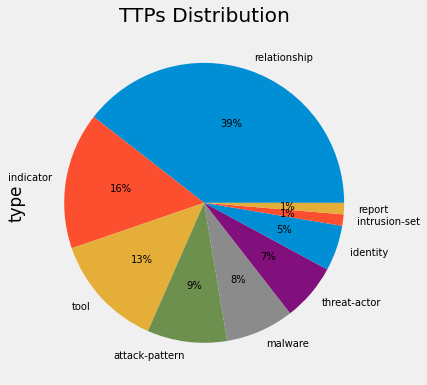

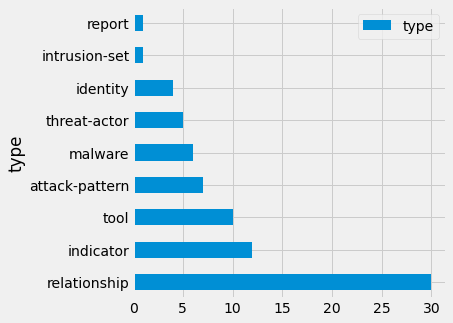

In [23]:
# Visualise the percentage distribution of TTPs grouped by type.
stixdf=df["objects"].apply(pd.Series)
ttps_stats = stixdf.groupby("type")['type'].count().sort_values(ascending=False)
plt.style.use('fivethirtyeight')
ttps_stats.plot.pie(labels=ttps_stats.keys(),autopct='%1.0f%%',title="TTPs Distribution",fontsize=10,figsize=(7,6))
ttps_stats.to_frame().plot(kind="barh",figsize=(5,5))
plt.show()


In [24]:
# Visualise the description of the TTPs grouped by type.
ttps_type = stixdf.groupby("type")['type'].count().sort_values(ascending=False)
type_group = stixdf.groupby("type")
#cols_malware= ['type', 'name','malware_types','description','external_references']
del ttps_type['relationship']
for ttps in ttps_type.index: 
 group = type_group.get_group(ttps)
 display(group.style.set_table_styles(styles).set_caption("TTPs description: "+"[ "+ttps+" ]"))